### Normaliczation

Normalization is a technique ofthen applied as part of data preparation for machine learning . the gole of normalization is to change the value of nummber columns in the dataset to use a common scale , without distorting difference in the range of values or osing information

1. MinMaxscaling
2. Mean normalization
3. Max absoult
4. Robust scaling

##### formula of Minscaling :
    1. Xi = Xi-Xmin/Xmax-Xmin

In [101]:
import numpy as np
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('wine_data.csv')

In [103]:
df.head()

,Class label,Alcohal,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Malic acid', ylabel='Density'>

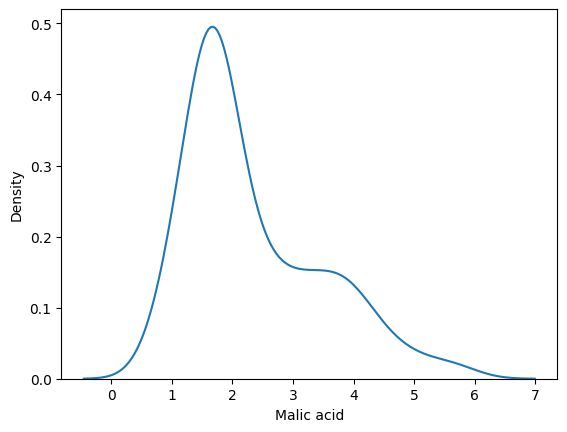

In [104]:
sns.kdeplot(df['Malic acid'])


<Axes: xlabel='Alcohal', ylabel='Malic acid'>

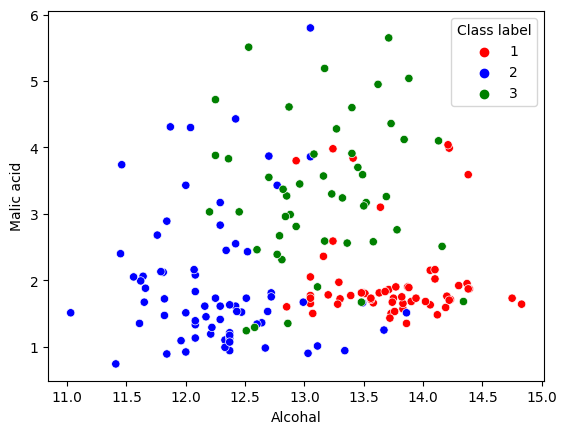

In [105]:
color_dict= {1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['Alcohal'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [106]:
from sklearn.model_selection import  train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('Class label',axis=1),
                                                         df['Class label'],
                                                         test_size=0.3,
                                                         random_state = 0)

X_train.shape,X_test.shape

((124, 2), (54, 2))

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()

# fit the scaler to the train set it well learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled  = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [109]:
np.round(X_train.describe(),1)

,Alcohal,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [110]:
np.round(X_train_scaled.describe(),1)

,Alcohal,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


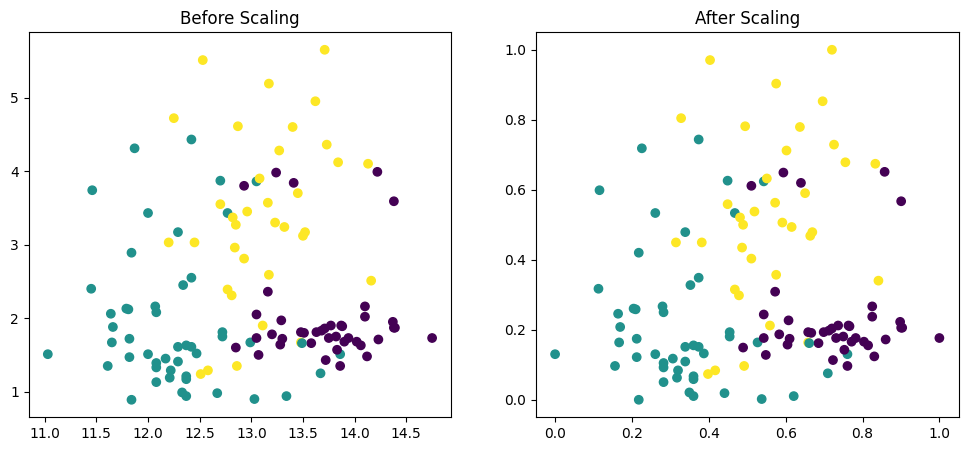

In [111]:
fig, (ax1 , ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Alcohal'],X_train['Malic acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohal'],X_train_scaled['Malic acid'],c=y_train)
ax2.set_title('After Scaling')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


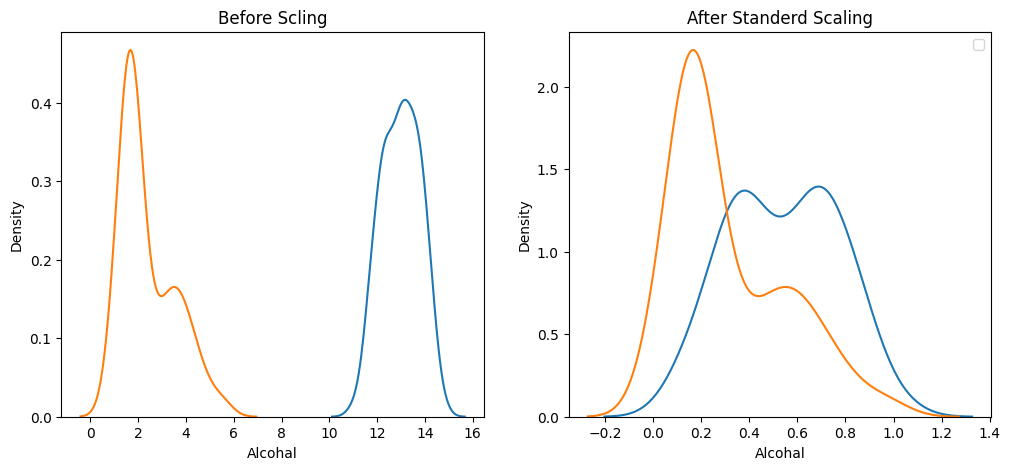

In [112]:
fig , (ax1 , ax2 ) = plt.subplots(ncols=2,figsize=(12 ,5))

# before scaling
ax1.set_title('Before Scling')
sns.kdeplot(X_train['Alcohal'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)
plt.legend()

# after scaling
ax2.set_title('After Standerd Scaling')
sns.kdeplot(X_test_scaled['Alcohal'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


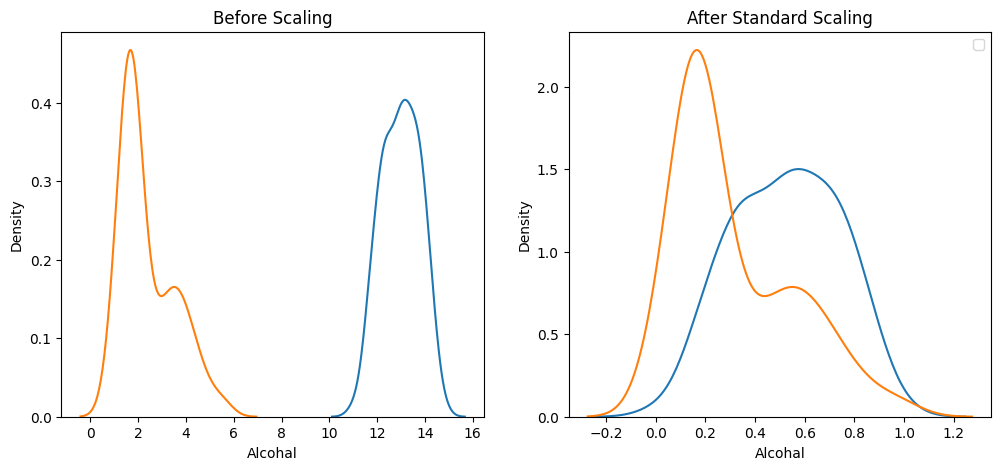

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohal'],label='Alcohal' ,ax=ax1)
sns.kdeplot(X_train['Malic acid'],label='Malic acid' ,ax=ax1)
plt.legend()

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohal'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

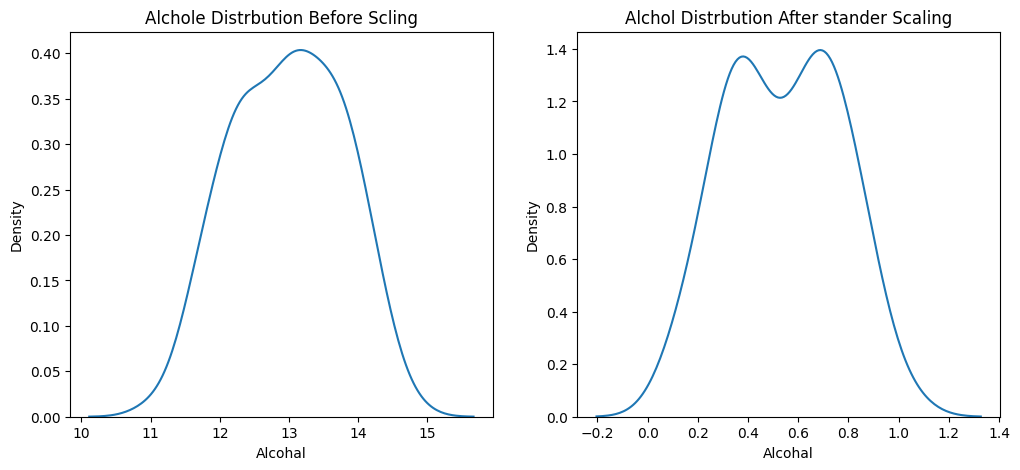

In [114]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('Alchole Distrbution Before Scling')
sns.kdeplot(X_train['Alcohal'] , ax=ax1)

# after scaling
ax2.set_title('Alchol Distrbution After stander Scaling')
sns.kdeplot(X_test_scaled['Alcohal'],ax=ax2)
plt.show()

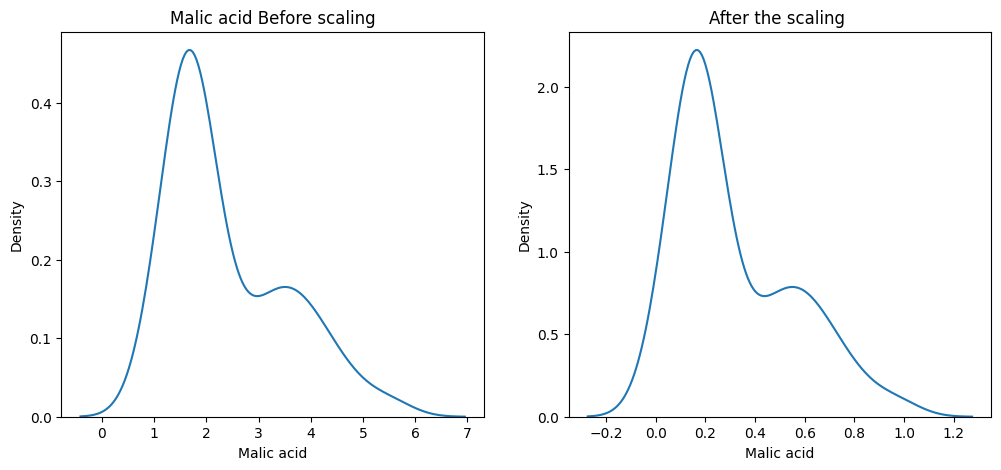

In [115]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# Before scaling
ax1.set_title("Malic acid Before scaling")
sns.kdeplot(X_train['Malic acid'],ax=ax1)


ax2.set_title("After the scaling ")
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

### Mean Normalization

some dataset present numerical feature highe lavel value .
use the formaul convert all value mean center 

    1. Xi = Xi-Xmean/Xmax-Xmin

use only on algorthim you neede center value
and this formual used sometime mean some pepole use .
loty of pepole used standerization

this funcation create you beacuse  is not avalible in sklearn

### MaxAbsScaling

1. formula Xi = Xi/Xmax

use only sparce data mean some data avalible loat of zero

### Robust Scaling

fromula = Xi = Xi-Xmedium/IQR { 75th prsentile value - 25th pr value}

use on dataset present of loat of outlier
 